In [1]:
pwd

'P:\\Projects\\puer\\notebooks'

In [2]:
cd ..

P:\Projects\puer


In [3]:
import pandas as pd
import numpy as np
from src.visualization.plots import plot_sent
%matplotlib inline

# Load stuff

In [4]:
base_df = pd.read_csv('data/score/SemEval14_test_baseline_v1.csv')
exp3_df = pd.read_csv('data/score/SemEval14_test_exp_3_v1.csv')
lexicon = pd.read_csv('data/processed/lexicon/lexicon_table.csv', index_col='WORD')

In [5]:
base_df.head()

,ASP,CLS,SENT,PRED,NEG,NEU,POS,ALPHA
0,food,1,the bread is top notch as well .,1,0.008854,0.008273,0.982873,"[0.005104960408061743, 0.0032664036843925714, ..."
1,service,1,i have to say they have one of the fastest del...,1,0.031988,0.105509,0.862503,"[0.019160743802785873, 0.0022917245514690876, ..."
2,food,1,food is always fresh and hot- ready to eat !,1,0.007820,0.007575,0.984606,"[0.0008278067107312381, 0.0014846435515210032,..."
3,food,1,did i mention that the coffee is outstanding ?,1,0.060383,0.054668,0.884950,"[0.006144334562122822, 0.014980634674429893, 0..."
4,ambience,1,"certainly not the best sushi in new york , how...",1,0.036716,0.006926,0.956358,"[0.002149326028302312, 0.0010587048018351197, ..."


In [6]:
(base_df.CLS == base_df.PRED).value_counts()[True]/len(base_df) # check if baseline acc correct

0.8211716341212744

In [7]:
exp3_df.head()

,ASP,CLS,SENT,PRED,NEG,NEU,POS,ALPHA
0,food,1,the bread is top notch as well .,1,0.012236,0.013007,0.974757,"[0.02019514888525009, 0.010086657479405403, 0...."
1,service,1,i have to say they have one of the fastest del...,1,0.043196,0.169718,0.787086,"[0.024016447365283966, 0.013345030136406422, 0..."
2,food,1,food is always fresh and hot- ready to eat !,1,0.006239,0.011919,0.981841,"[0.010474617592990398, 0.017595455050468445, 0..."
3,food,1,did i mention that the coffee is outstanding ?,1,0.103184,0.111462,0.785354,"[0.014308671467006207, 0.02559753507375717, 0...."
4,ambience,1,"certainly not the best sushi in new york , how...",1,0.055819,0.013617,0.930564,"[0.029549507424235344, 0.017148654907941818, 0..."


In [8]:
(exp3_df.CLS == exp3_df.PRED).value_counts()[True]/len(exp3_df) # check if exp3 acc correct

0.8314491264131552

In [9]:
exp3_improved = pd.read_csv('data/score/exp3_improved.csv', index_col='Unnamed: 0')
exp3_worse = pd.read_csv('data/score/exp3_worse.csv', index_col='Unnamed: 0')

In [10]:
exp3_improved.head()

,ASP,CLS,SENT,PRED,NEG,NEU,POS,PRED_E3,NEG_E3,NEU_E3,POS_E3
23,service,-1.0,the two waitress 's looked like they had been ...,1.0,0.336235,0.211024,0.452741,-1,0.440126,0.259519,0.300355
48,food,-1.0,how pretentious and inappropriate for mj grill...,1.0,0.215336,0.203960,0.580704,-1,0.470175,0.338154,0.191671
95,service,-1.0,i was highly disappointed by their service and...,1.0,0.134204,0.025842,0.839954,-1,0.600423,0.067349,0.332228
96,food,-1.0,i was highly disappointed by their service and...,1.0,0.134204,0.025842,0.839954,-1,0.600423,0.067349,0.332228
118,service,-1.0,the management was less than accomodating .,1.0,0.345240,0.101270,0.553490,-1,0.496270,0.202097,0.301633


In [11]:
exp3_worse.head()

,ASP,CLS,SENT,PRED,NEG,NEU,POS,PRED_E3,NEG_E3,NEU_E3,POS_E3
49,food,-1,two wasted steaks -- what a crime !,-1,0.438996,0.299798,0.261206,1.0,0.215030,0.272072,0.512898
72,miscellaneous,1,i 've been coming here on and off for the past...,1,0.132156,0.250443,0.617401,0.0,0.175869,0.487707,0.336424
188,ambience,0,the decor is designed in a contemporary japane...,0,0.069746,0.465243,0.465011,1.0,0.050318,0.088925,0.860758
241,miscellaneous,1,"people in the neighborhood seem to love it , t...",1,0.411946,0.172351,0.415703,-1.0,0.421715,0.235843,0.342442
245,miscellaneous,-1,have to tell you : not at all impressed .,-1,0.466236,0.121402,0.412362,1.0,0.281023,0.217869,0.501108


# Error Analysis

In [12]:
def compare(idx, figsize=(12,3)):
    sb = base_df.iloc[idx]
    plot_sent(sb.SENT.split(), sb.ALPHA, lexicon, title='Baseline', figsize=figsize)
    
    se = exp3_df.iloc[idx]
    plot_sent(se.SENT.split(), se.ALPHA, lexicon, title='Exp_3', figsize=figsize)
    
    print(f'PRED:  Base: {sb.PRED}, Exp3: {se.PRED}')
    print(f'LABEL: {sb.CLS}')
    print(f'ASP:   {sb.ASP}\n')
    print(f"{sb[['NEG', 'NEU', 'POS']].to_frame('BASE_PROB').transpose()}")
    print(f"{se[['NEG', 'NEU', 'POS']].to_frame('EXP3_PROB').transpose()}")

## Exp3 trade off

**Interesting ones**

PRED:  Base: -1, Exp3: 1
LABEL: -1
ASP:   food

                NEG       NEU       POS
BASE_PROB  0.438996  0.299798  0.261206
               NEG       NEU       POS
EXP3_PROB  0.21503  0.272072  0.512898


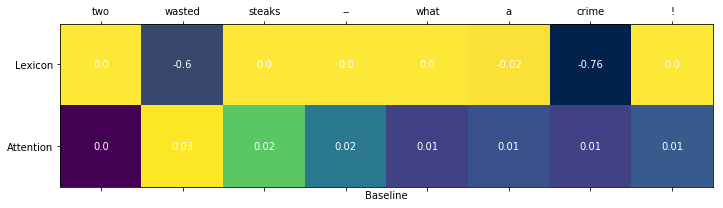

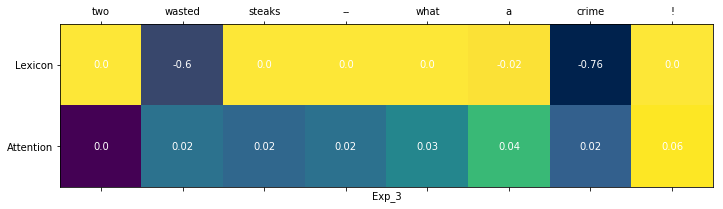

In [13]:
compare(49)

Exp_3 looks at "!" most, is "!" associated with positive more in the training set?

PRED:  Base: 1, Exp3: 0
LABEL: 1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.132156  0.250443  0.617401
                NEG       NEU       POS
EXP3_PROB  0.175869  0.487707  0.336424


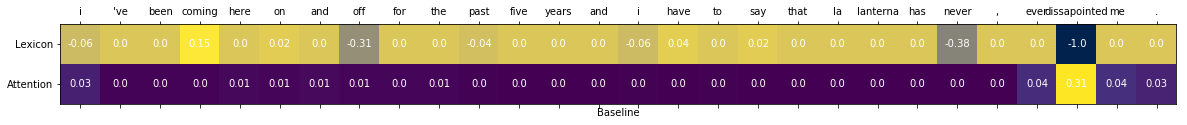

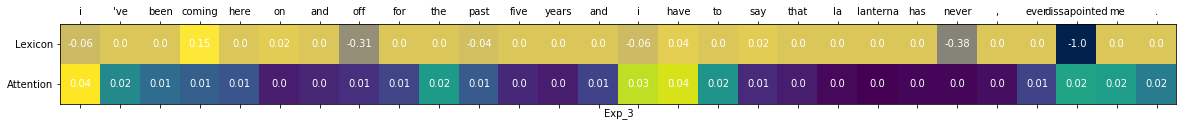

In [15]:
compare(72, figsize=(20,3))

Quite a long sentece, attention for exp_3 is quite spreaded, and exp_3's second guess is positive

PRED:  Base: -1, Exp3: 1
LABEL: -1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.466235  0.121402  0.412362
                NEG       NEU       POS
EXP3_PROB  0.281023  0.217869  0.501108


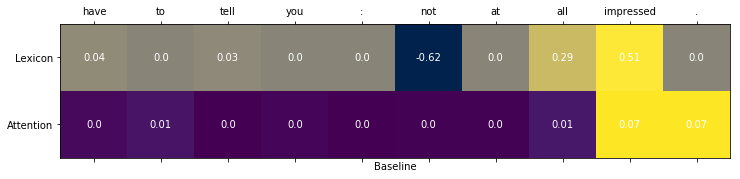

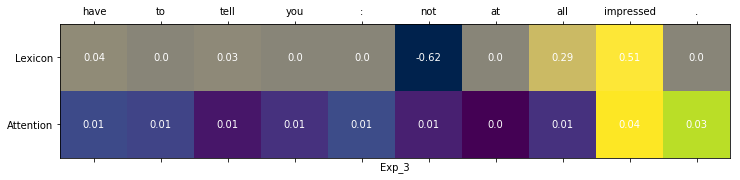

In [18]:
compare(245)

Not quite stable when dealing with negation

PRED:  Base: 1, Exp3: -1
LABEL: 1
ASP:   food

                NEG        NEU      POS
BASE_PROB  0.133949  0.0223806  0.84367
                NEG       NEU       POS
EXP3_PROB  0.493083  0.100622  0.406295


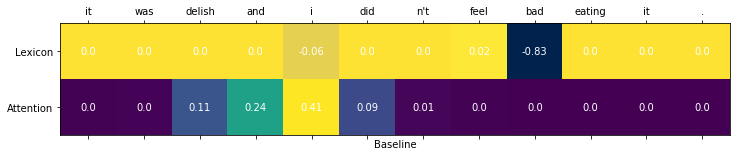

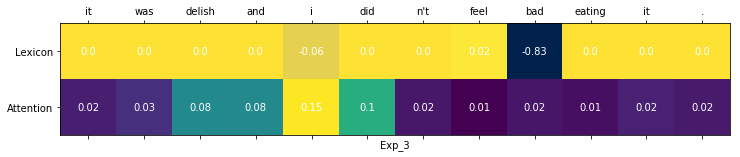

In [22]:
compare(516)

Baseline is not looking at the last parts of the sentence at all, exp_3 did however seems not benefeting from it.

PRED:  Base: 1, Exp3: 0
LABEL: 1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.249572  0.329733  0.420694
                NEG       NEU       POS
EXP3_PROB  0.221343  0.389819  0.388838


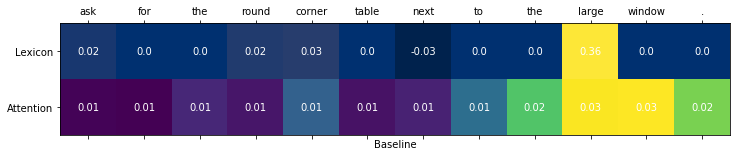

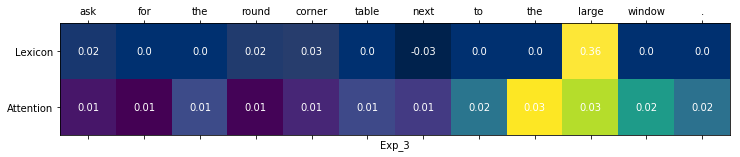

In [23]:
compare(601)

This seems Neutral to me!

PRED:  Base: 0, Exp3: 1
LABEL: 0
ASP:   food

                 NEG      NEU       POS
BASE_PROB  0.0615245  0.55868  0.379795
                NEG       NEU       POS
EXP3_PROB  0.083903  0.402969  0.513128


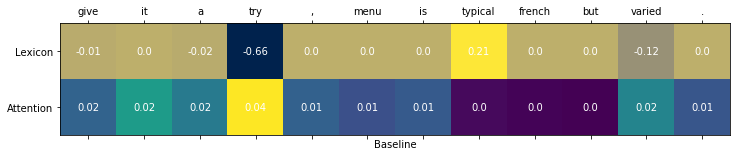

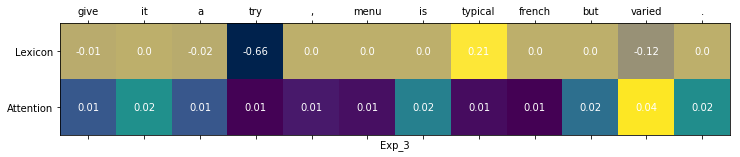

In [27]:
compare(663)

PRED:  Base: 1, Exp3: 0
LABEL: 1
ASP:   ambience

                NEG       NEU       POS
BASE_PROB  0.168789  0.328277  0.502934
                NEG       NEU       POS
EXP3_PROB  0.172502  0.451883  0.375615


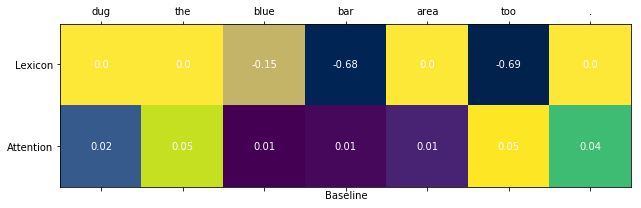

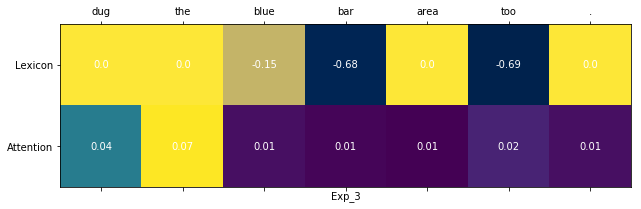

In [32]:
compare(751)

This seems Neutral to me too!

PRED:  Base: 1, Exp3: -1
LABEL: 1
ASP:   food

                NEG        NEU       POS
BASE_PROB  0.421735  0.0622786  0.515986
                NEG       NEU       POS
EXP3_PROB  0.466012  0.144924  0.389065


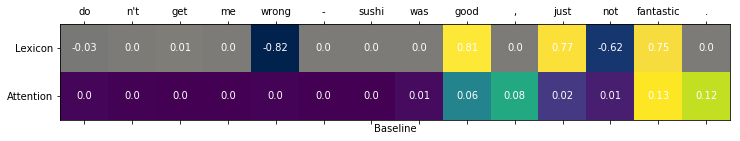

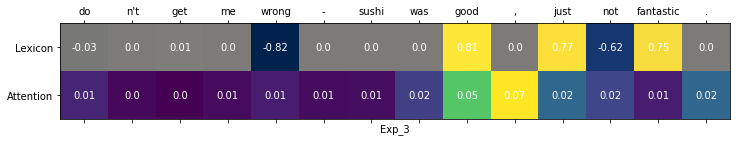

In [45]:
compare(891)

PRED:  Base: 0, Exp3: 1
LABEL: 0
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.197006  0.467936  0.335058
                 NEG        NEU       POS
EXP3_PROB  0.0252244  0.0440302  0.930745


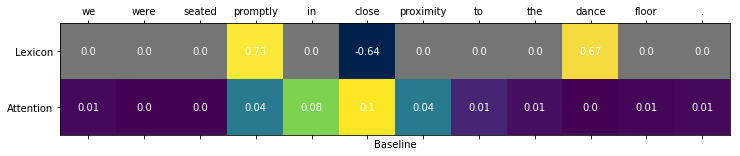

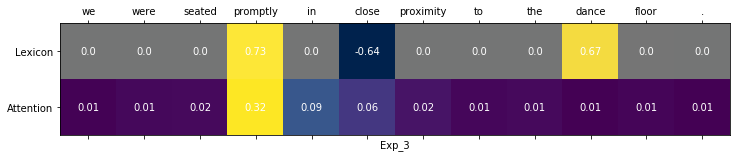

In [47]:
compare(912)

Affected by lexicon? Not a commonly seen though in these error analysis

PRED:  Base: 1, Exp3: 0
LABEL: 1
ASP:   miscellaneous

                 NEG      NEU       POS
BASE_PROB  0.0481223  0.39038  0.561497
                 NEG      NEU       POS
EXP3_PROB  0.0531249  0.59563  0.351245


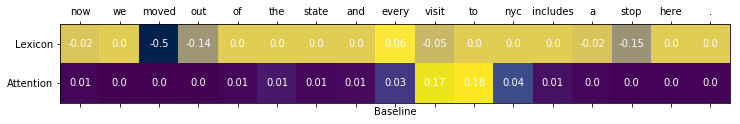

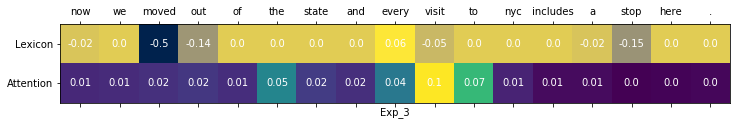

In [48]:
compare(932)

---

PRED:  Base: 1, Exp3: -1
LABEL: 1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.178073  0.396055  0.425872
                NEG       NEU       POS
EXP3_PROB  0.370259  0.365892  0.263849


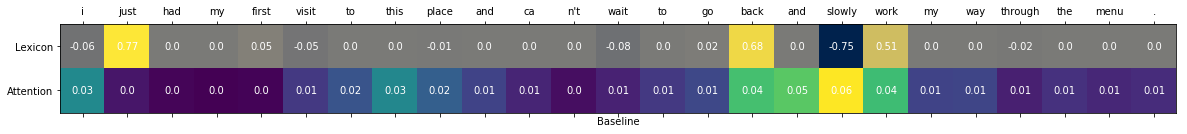

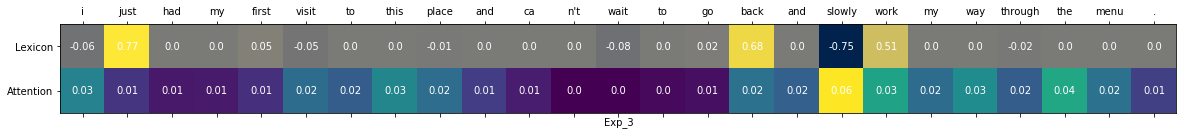

In [55]:
compare(959, figsize=(20,3))

PRED:  Base: -1, Exp3: 1
LABEL: -1
ASP:   price

                NEG      NEU       POS
BASE_PROB  0.463856  0.31569  0.220454
                NEG       NEU       POS
EXP3_PROB  0.279745  0.265582  0.454673


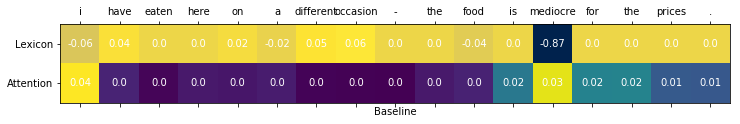

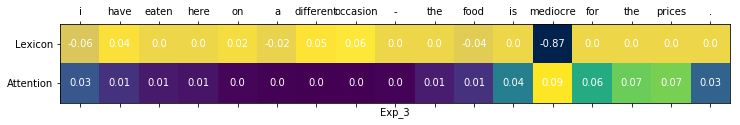

In [53]:
compare(956)

PRED:  Base: 0, Exp3: 1
LABEL: 0
ASP:   food

                 NEG       NEU       POS
BASE_PROB  0.0177988  0.615479  0.366723
                 NEG        NEU       POS
EXP3_PROB  0.0117173  0.0665507  0.921732


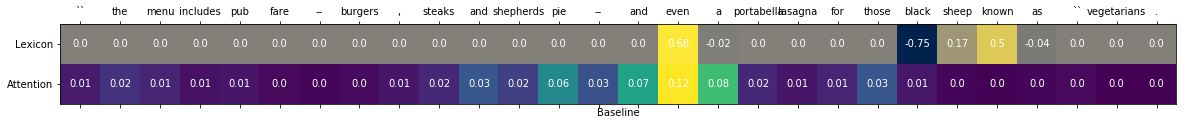

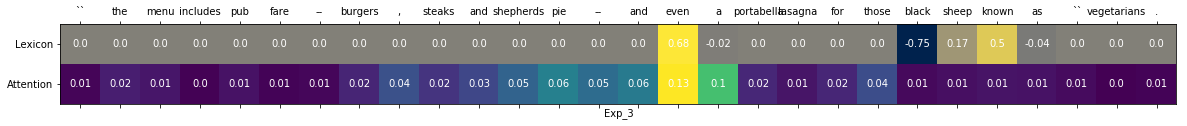

In [52]:
compare(950, figsize=(20,3))

PRED:  Base: 1, Exp3: -1
LABEL: 1
ASP:   food

                NEG       NEU       POS
BASE_PROB  0.389516  0.118095  0.492389
                NEG       NEU       POS
EXP3_PROB  0.474557  0.183936  0.341507


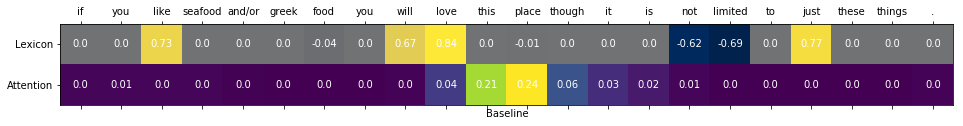

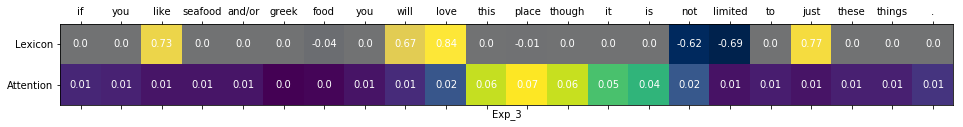

In [50]:
compare(949, figsize=(16,3))

PRED:  Base: 0, Exp3: 1
LABEL: 0
ASP:   ambience

               NEG       NEU       POS
BASE_PROB  0.11685  0.569352  0.313799
                 NEG       NEU       POS
EXP3_PROB  0.0784648  0.346477  0.575059


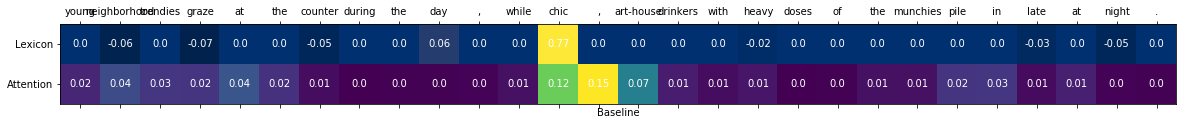

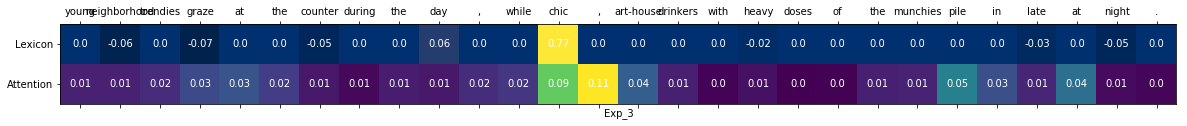

In [44]:
compare(882, figsize=(20,3))

PRED:  Base: 1, Exp3: 0
LABEL: 1
ASP:   miscellaneous

                 NEG       NEU       POS
BASE_PROB  0.0466198  0.338559  0.614821
                 NEG       NEU       POS
EXP3_PROB  0.0608538  0.471878  0.467268


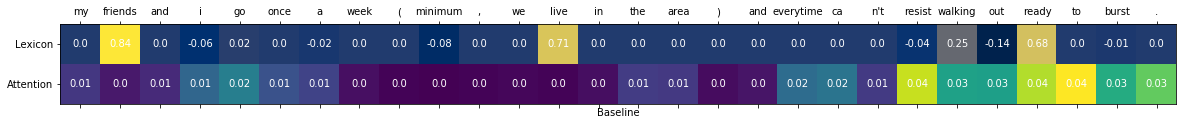

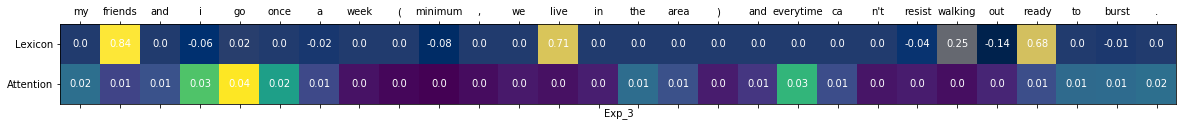

In [42]:
compare(879, figsize=(20,3))

PRED:  Base: -1, Exp3: 1
LABEL: -1
ASP:   food

                NEG       NEU      POS
BASE_PROB  0.516173  0.127867  0.35596
                NEG       NEU      POS
EXP3_PROB  0.230965  0.158075  0.61096


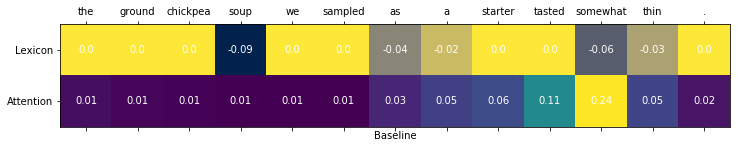

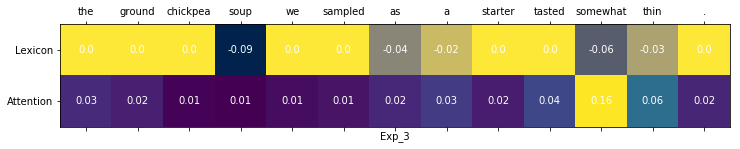

In [40]:
compare(864)

PRED:  Base: -1, Exp3: 1
LABEL: -1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.479581  0.173407  0.347011
                NEG       NEU       POS
EXP3_PROB  0.320824  0.111189  0.567987


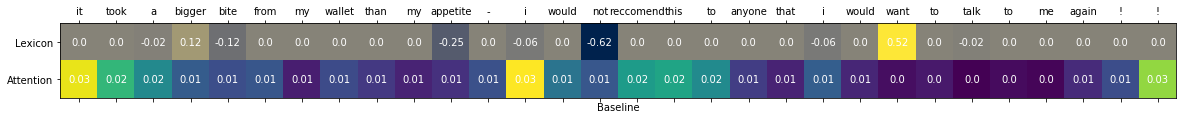

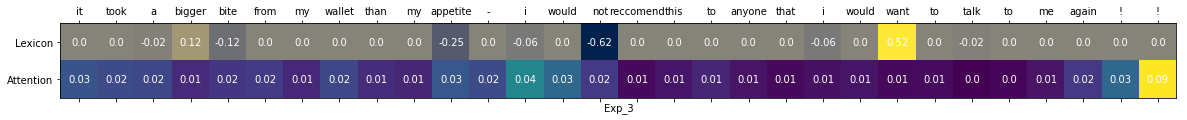

In [39]:
compare(840, figsize=(20,3))

PRED:  Base: -1, Exp3: 1
LABEL: -1
ASP:   food

                NEG       NEU       POS
BASE_PROB  0.479581  0.173407  0.347011
                NEG       NEU       POS
EXP3_PROB  0.320824  0.111189  0.567987


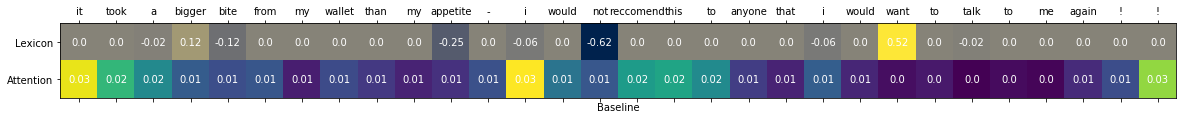

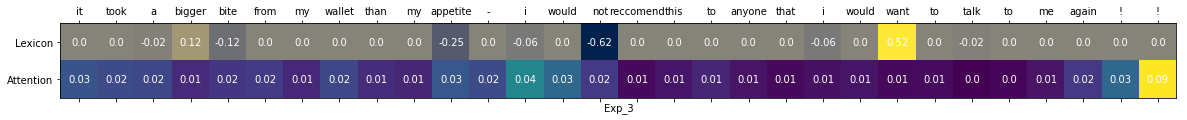

In [38]:
compare(839, figsize=(20,3))

PRED:  Base: -1, Exp3: 1
LABEL: -1
ASP:   price

                NEG       NEU       POS
BASE_PROB  0.479581  0.173407  0.347011
                NEG       NEU       POS
EXP3_PROB  0.320824  0.111189  0.567987


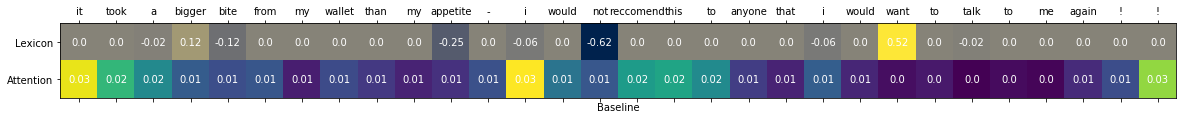

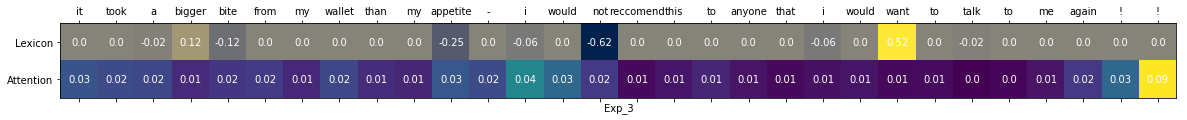

In [37]:
compare(838, figsize=(20,3))

PRED:  Base: 1, Exp3: 0
LABEL: 1
ASP:   food

                 NEG       NEU       POS
BASE_PROB  0.0790673  0.372673  0.548259
                 NEG      NEU       POS
EXP3_PROB  0.0985831  0.62359  0.277827


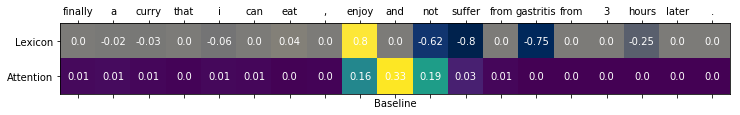

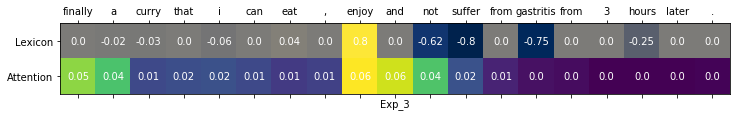

In [35]:
compare(829)

PRED:  Base: -1, Exp3: 1
LABEL: -1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.631034  0.207343  0.161623
                NEG       NEU       POS
EXP3_PROB  0.423513  0.149842  0.426645


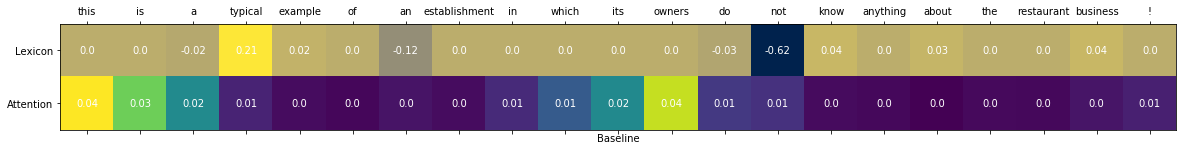

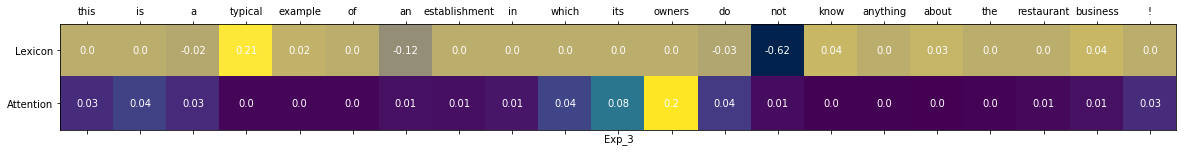

In [34]:
compare(810, figsize=(20,3))

PRED:  Base: 1, Exp3: -1
LABEL: 1
ASP:   service

                 NEG       NEU       POS
BASE_PROB  0.0940255  0.221302  0.684672
               NEG       NEU       POS
EXP3_PROB  0.48808  0.166971  0.344949


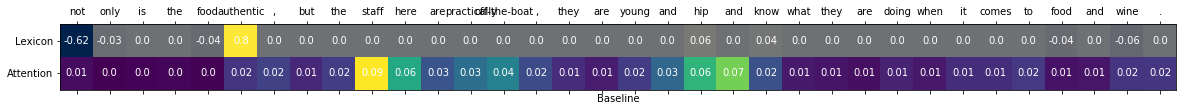

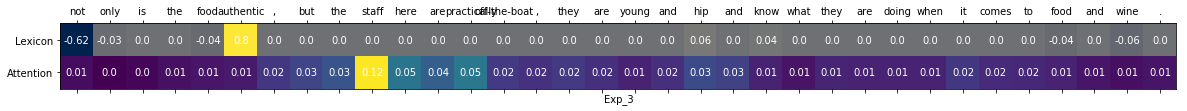

In [31]:
compare(711, figsize=(20,3))

PRED:  Base: 1, Exp3: -1
LABEL: 1
ASP:   food

                 NEG       NEU       POS
BASE_PROB  0.0940255  0.221302  0.684672
               NEG       NEU       POS
EXP3_PROB  0.48808  0.166971  0.344949


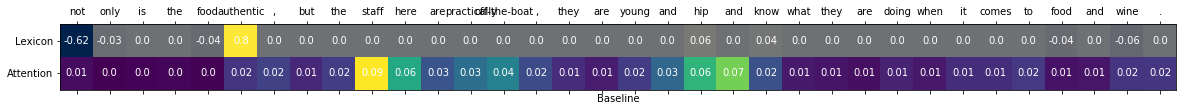

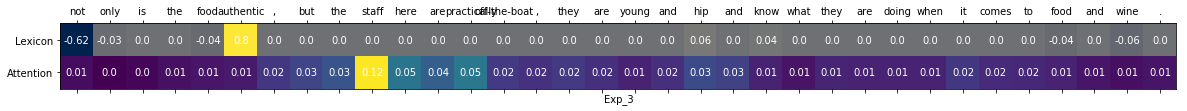

In [29]:
compare(710, figsize=(20,3))

PRED:  Base: 1, Exp3: 0
LABEL: 1
ASP:   ambience

                NEG       NEU       POS
BASE_PROB  0.256839  0.321696  0.421465
               NEG       NEU       POS
EXP3_PROB  0.30032  0.382626  0.317054


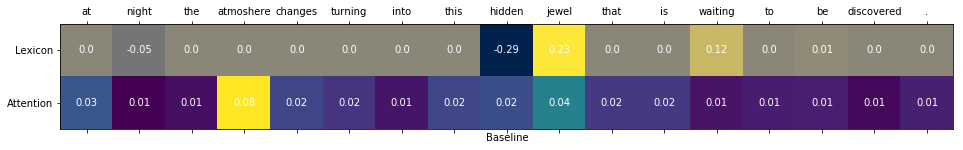

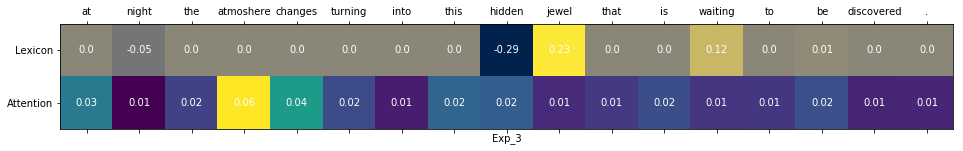

In [26]:
compare(610, figsize=(16,3))

PRED:  Base: 1, Exp3: -1
LABEL: 1
ASP:   miscellaneous

               NEG       NEU       POS
BASE_PROB  0.37528  0.140766  0.483954
                NEG       NEU       POS
EXP3_PROB  0.545572  0.133939  0.320489


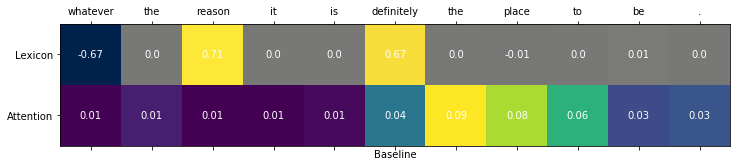

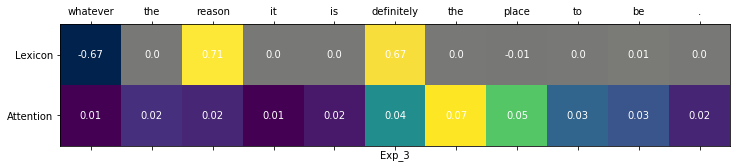

In [21]:
compare(481)

PRED:  Base: 1, Exp3: -1
LABEL: 1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.319969  0.209367  0.470664
                NEG       NEU       POS
EXP3_PROB  0.525504  0.200815  0.273682


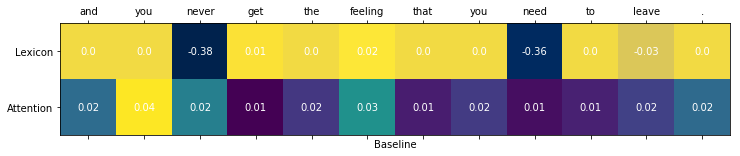

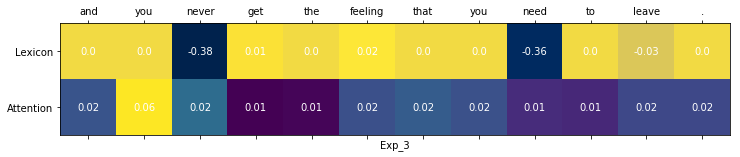

In [20]:
compare(405)

PRED:  Base: -1, Exp3: 0
LABEL: -1
ASP:   food

                NEG       NEU       POS
BASE_PROB  0.422115  0.374401  0.203485
                NEG       NEU       POS
EXP3_PROB  0.310918  0.481564  0.207517


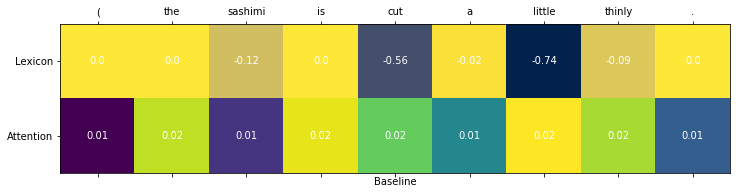

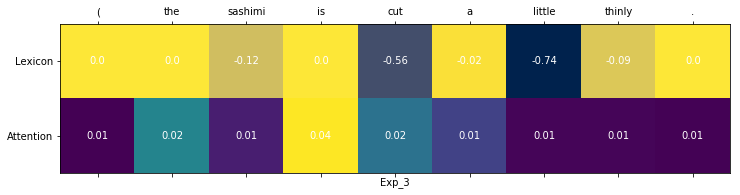

In [19]:
compare(272)

PRED:  Base: 1, Exp3: -1
LABEL: 1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.411946  0.172351  0.415703
                NEG       NEU       POS
EXP3_PROB  0.421715  0.235843  0.342442


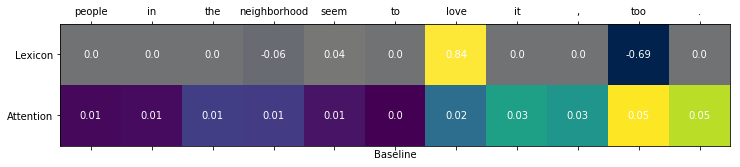

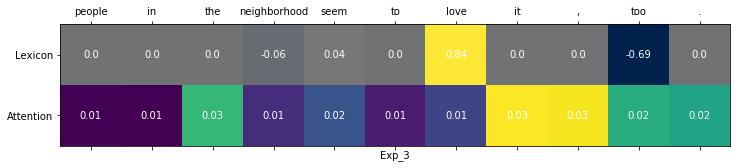

In [17]:
compare(241)

PRED:  Base: 0, Exp3: 1
LABEL: 0
ASP:   ambience

                 NEG       NEU       POS
BASE_PROB  0.0697461  0.465243  0.465011
                 NEG       NEU       POS
EXP3_PROB  0.0503175  0.088925  0.860758


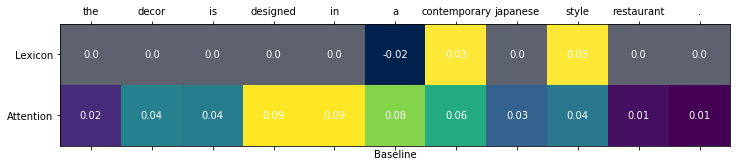

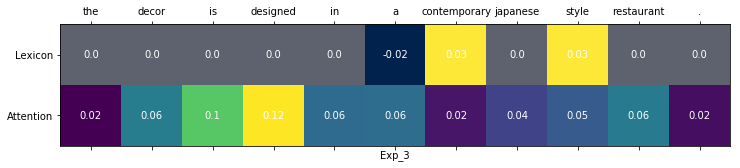

In [16]:
compare(188)